## Exploratory Data Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# importing modules from scripts 
from scripts.eda_analysis import *
from scripts.logger import setup_logger

In [4]:
#logger
logger = setup_logger('eda_logger', '../logs/eda.log')

In [5]:
# Load the data
df = load_data('../data/data.csv')
variables=load_data('../data/Xente_Variable_Definitions.csv')
logger.info("Data loaded successfully.")

In [6]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [7]:
df.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


In [8]:
# Overview of the Data
print("Data Overview:")
data_overview(df)
logger.info("Data overview analysis completed.")

Data Overview:
Dataset Shape: (95662, 16)

Column Names: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Missing Values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode    

-  The dataset consists of 95,662 rows and 16 columns with no missing values across any of the columns
- All the columns have correct datatypes except TransactionDate should be in a datetime format to use them in time-based analysis

In [9]:
# Identify for any duplicate transaction
duplicates = df.duplicated().sum()
print(duplicates)

0


- There are  no duplicate rows in the dataset

### columns description 

In [10]:
# columns definitions 
print("\n Variables Definitions")
print(variables)


 Variables Definitions
             Column Name                                         Definition
0          TransactionId         Unique �transaction identifier on platform
1                BatchId  Unique number assigned to a batch of transacti...
2              AccountId  Unique number identifying the customer on plat...
3         SubscriptionId  Unique number identifying the customer subscri...
4             CustomerId              Unique identifier attached to Account
5           CurrencyCode                                   Country currency
6            CountryCode             Numerical geographical code of country
7             ProviderId                   Source provider of Item �bought.
8              ProductId                            Item name being bought.
9        ProductCategory  ProductIds are organized into these broader pr...
10             ChannelId  Identifies if customer used web,Android, IOS, ...
11                Amount  Value of the transaction. Positive for

### Summary Statistics

In [11]:
#  Summary Statistics
print("\n Summary Statistics:")
print(summary_statistics(df))
logger.info("Summary statistics of numeric columns completed")


 Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


summary statistics of numeric variables shows:
- CountryCode - The CountryCode is constant across all records, with every entry having a value of 256. It indicates that all transactions originate from a single country(UGX).
- Amount - Amount variable exhibits a very wide range from -1,000,000 to 9,880,000, with a high standard deviation of approximately 123,307 suggesting significant variability in transaction amounts.The median (1,000) is significantly lower than the mean (6,717.846), indicating a right-skewed distribution with a concentration of lower transaction amounts and a few extremely high values.
- Value- The median (1,000) is much lower than the mean (9,900.584), indicating a right-skewed distribution with most transactions having lower values and a few high-value transactions.
- The FraudResult variable shows 0.2018% of transactions labeled as fraudulent (mean = 0.002018). The vast majority of transactions are legitimate (label = 0).


In [12]:
# Check the number of unique values in categorical columns
print (df['ProductCategory'].unique())
print (df['CountryCode'].unique())
print (df['ChannelId'].unique())

['airtime' 'financial_services' 'utility_bill' 'data_bundles' 'tv'
 'transport' 'ticket' 'movies' 'other']
[256]
['ChannelId_3' 'ChannelId_2' 'ChannelId_1' 'ChannelId_5']


## Univariate Analysis 

### 1. Distribution of Numerical Features 


3. Distribution of Numerical Features:


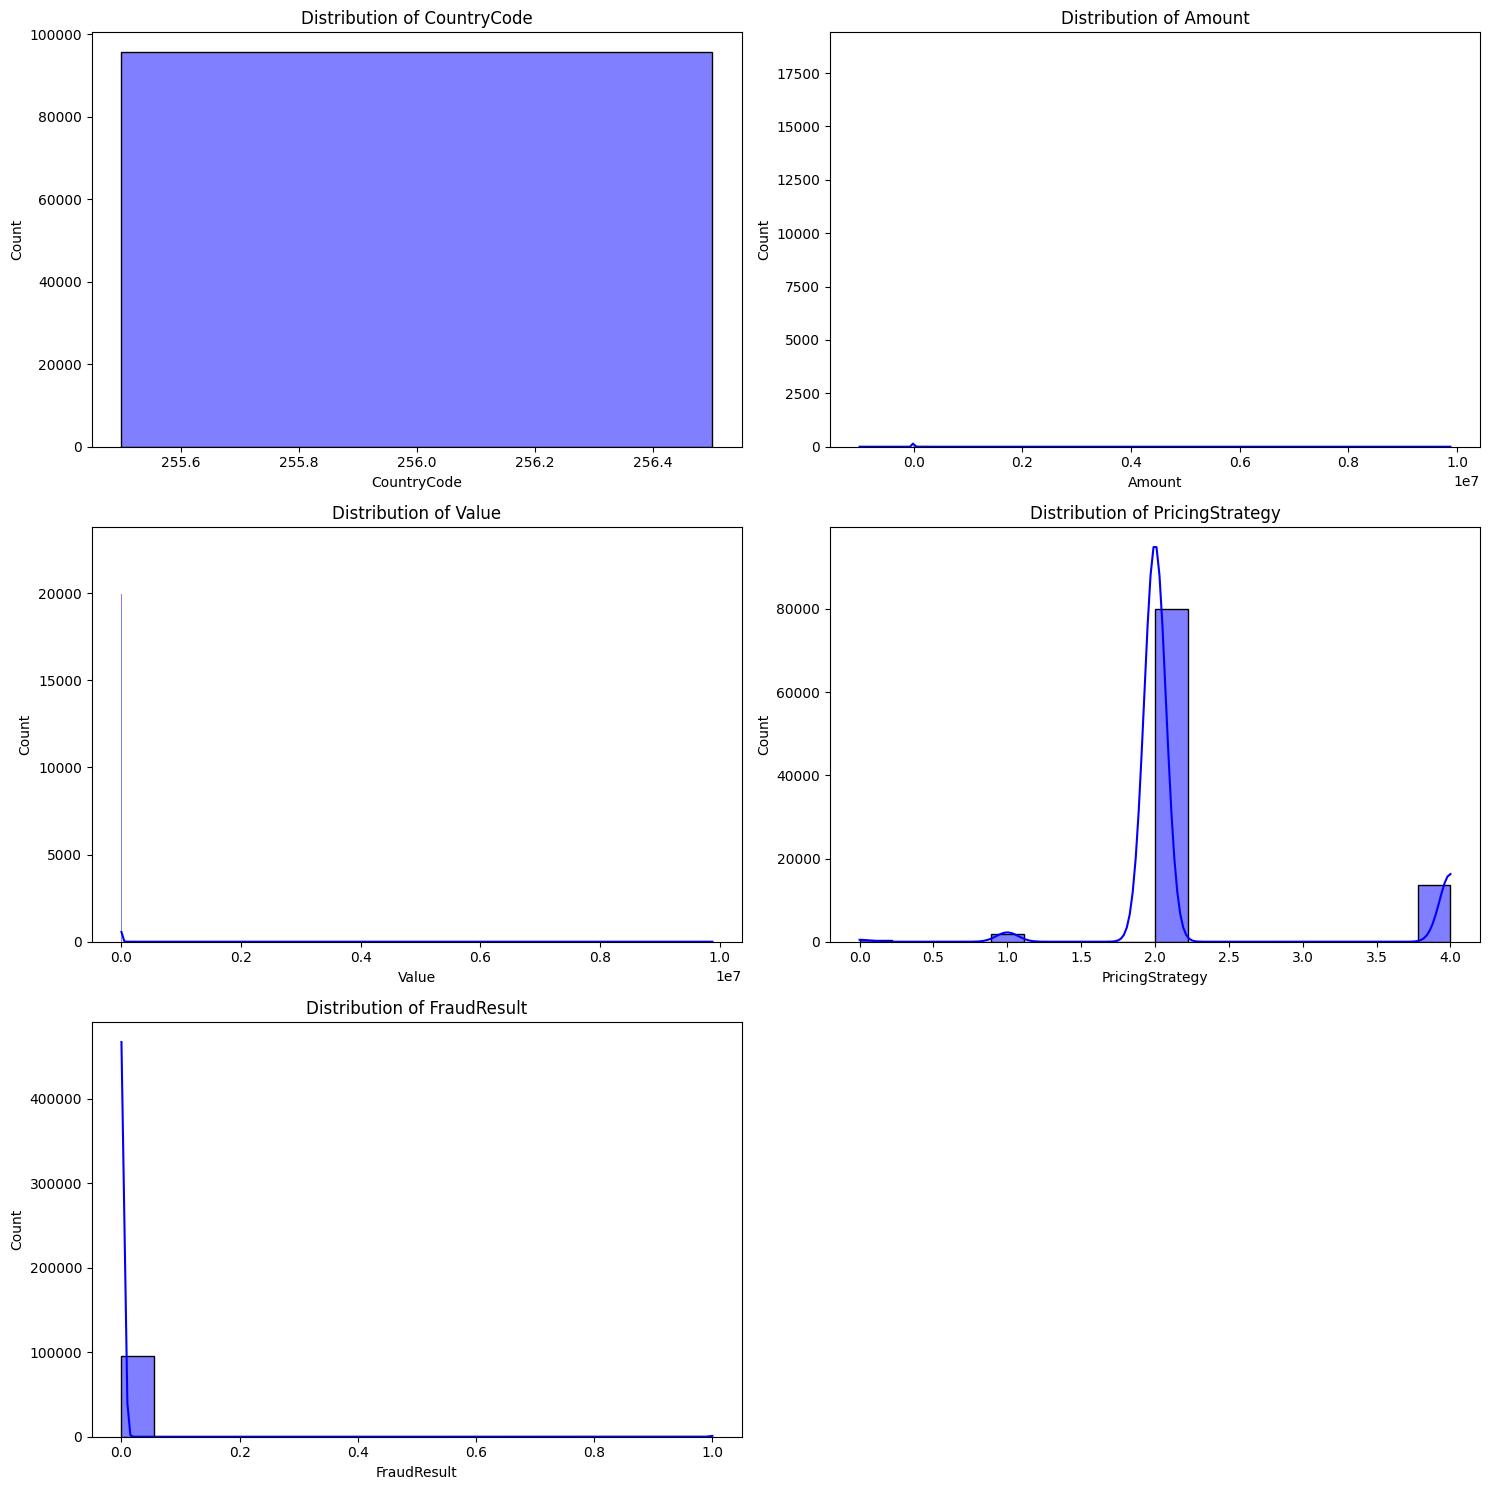

In [13]:
#  Distribution of Numerical Features
print("\n3. Distribution of Numerical Features:")
plot_numerical_distributions(df)
logger.info("univariate analysis of numeric columns completed")

- CountryCode: The plot shows a single value,  indicating only one country code is represented.
- Amount: The plot shows a highly skewed distribution, with most of the values being quite small. A very small number of observations have higher values, leading to the long tail on the right side of the graph. This could indicate potential outliers or rare, large transactions.
- Value: Similar to the Amount distribution, it also shows a highly skewed distribution with most values near zero and several outliers extending to higher values 
- PricingStrategy:The PricingStrategy variable shows a more varied distribution, with most of the values centered around a specific strategy (strategy 2, given the peak). There is a notable, though smaller, occurrence of values around strategy 4, with a gap in between.
- FraudResult: The majority of observations have a FraudResult of 0 (indicating non-fraudulent transactions), with very few transactions marked as fraudulent.

### 2. Distribution of Categorical Features 


4. Distribution of Categorical Features:


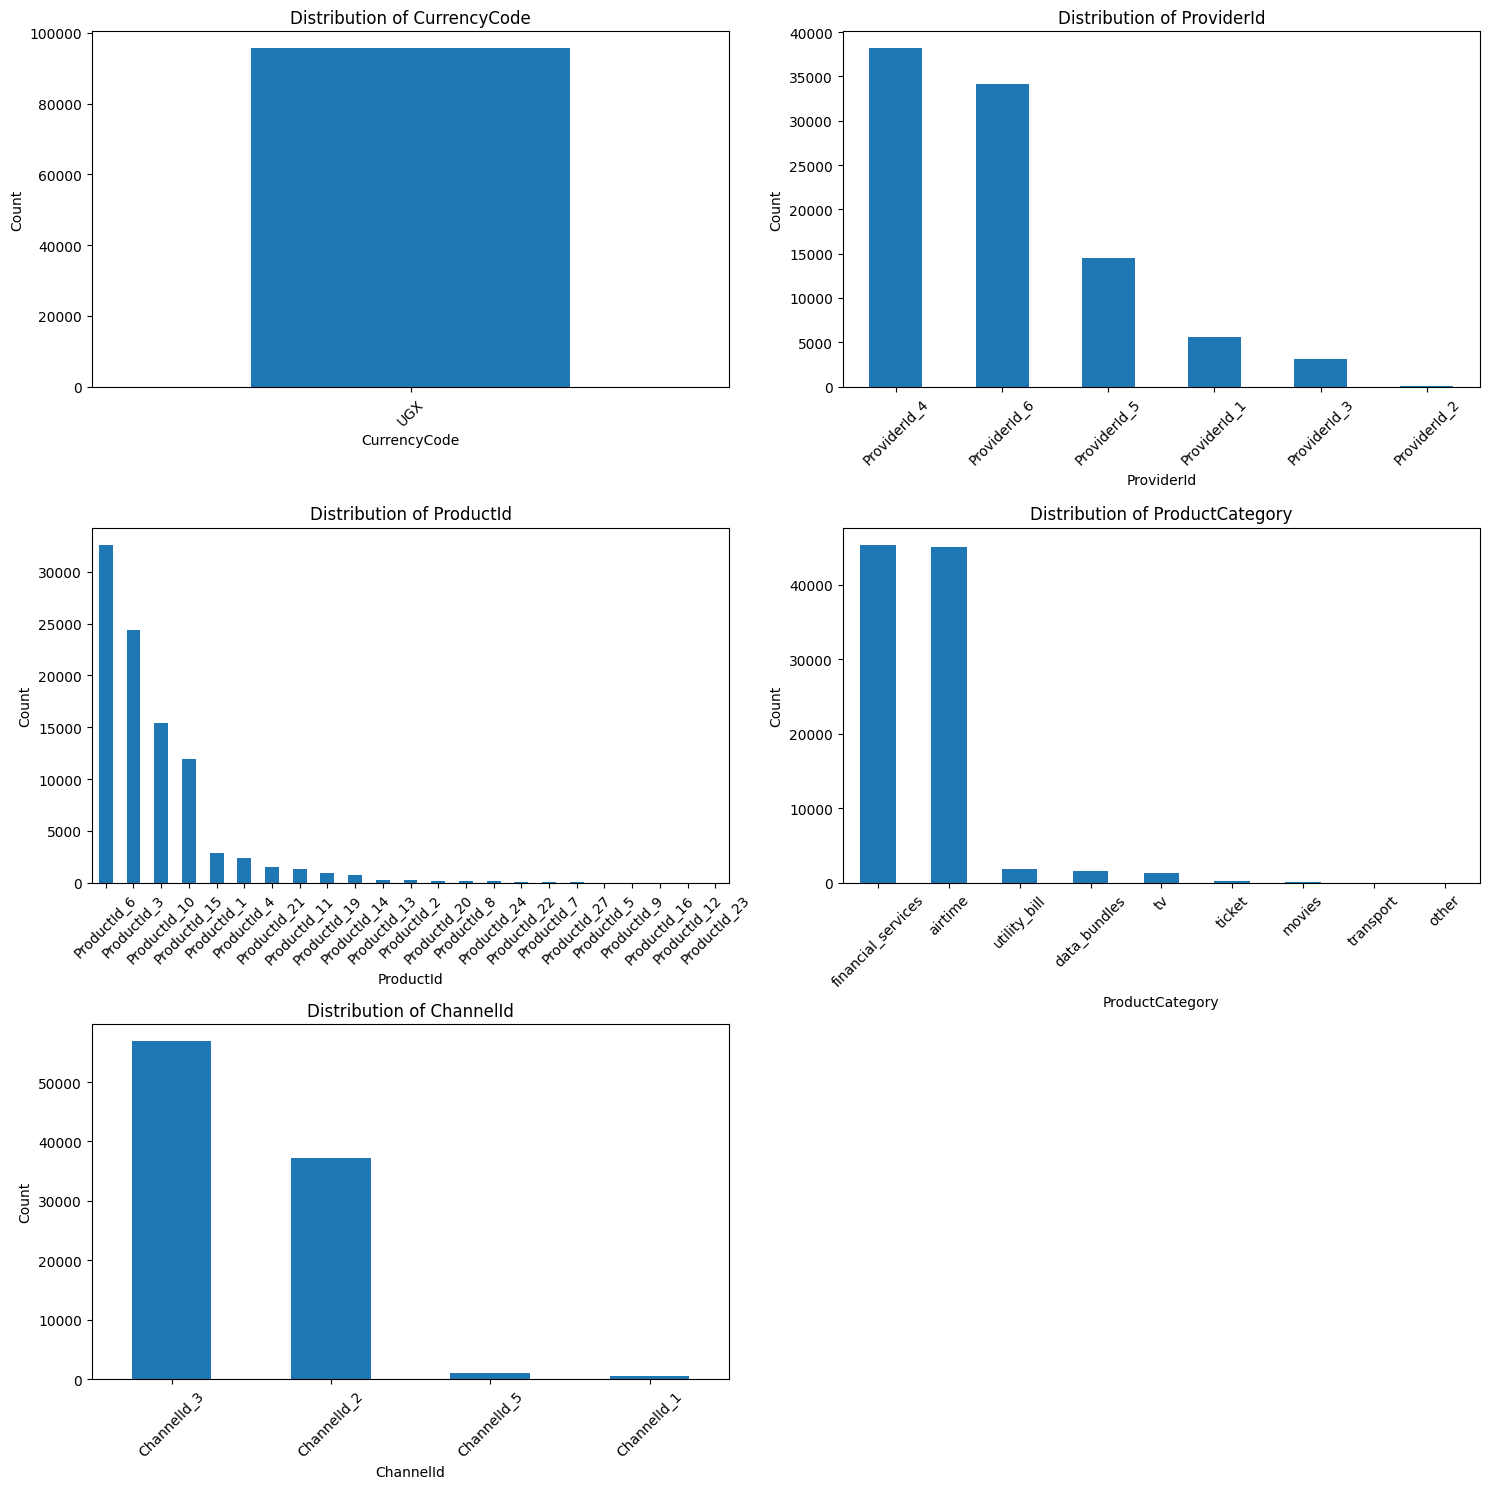

In [14]:
# Distribution of Categorical Features
print("\n4. Distribution of Categorical Features:") 
categorical_columns=['CurrencyCode','ProviderId','ProductId','ProductCategory','ChannelId'] # Specify the columns you want
plot_categorical_distributions(df, categorical_columns)
logger.info("univariate analysis of categorical columns completed")

- CurrencyCode: The data contains only one currency, "UGX" (Ugandan Shilling), meaning that all transactions are conducted in the same currency. It may not contribute much to the analysis or modeling process.
- ProviderId: The ProviderId feature shows a clear disparity among providers, with ProviderId_4 and ProviderId_6 dominating the dataset. Smaller providers (like ProviderId_2 and ProviderId_3) contribute a much smaller number of transactions. This indicates that the majority of transactions are concentrated in just a few providers.
- ProductId: The ProductId distribution is heavily skewed towards certain products, with ProductId_3, ProductId_15, and ProductId_16 having the highest counts. Most other products have very few transactions, leading to a long tail on the right. This suggests that only few of products are highly popular, while many others are rarely used.
- ProductCategory: The majority of transactions are concentrated in two categories: financial_services and airtime. Other categories, such as utility_bill, data_bundles, and tv, represent a much smaller portion of the dataset. 
- ChannelId: The ChannelId feature shows that ChannelId_3 is the most frequently used, followed by ChannelId_2. The other channels are rarely used, contributing very few transactions. This indicates that most of the activity occurs through the two primary channels.

### Correlation Analysis of Numerical Features


5. Correlation Analysis:


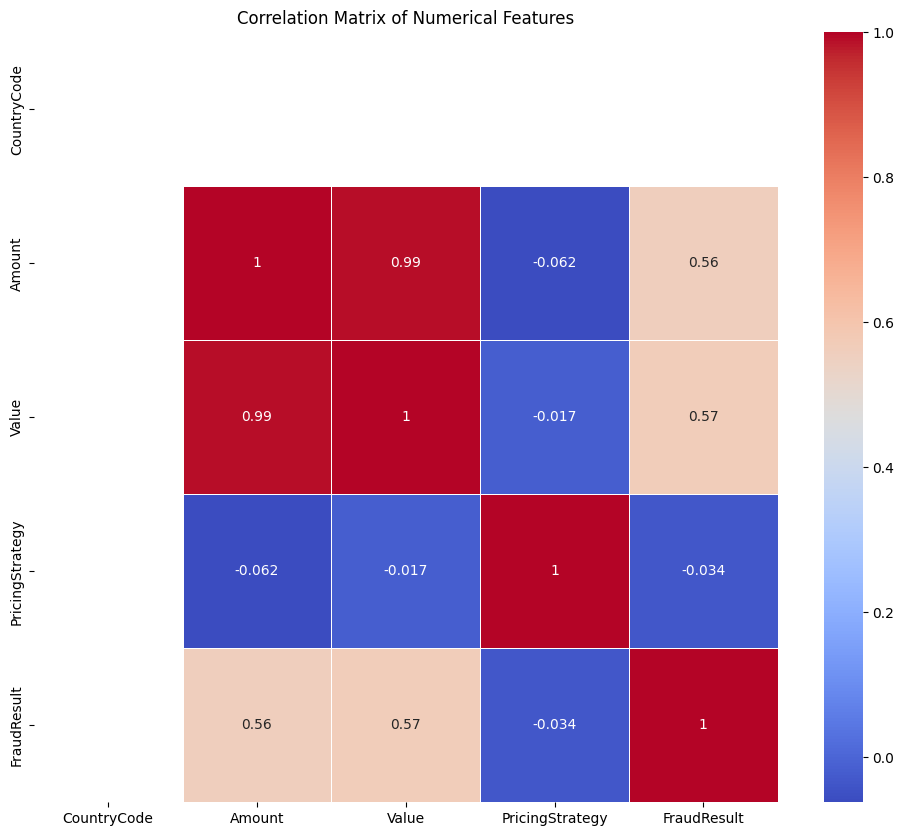

In [15]:
# Correlation Analysis
print("\n5. Correlation Analysis:")
correlation_analysis(df)

The heatmap presents the correlation matrix of numerical features 
   -  Amount and Value: These two features have a very high positive correlation of 0.99, indicating that they are almost perfectly linearly related. This suggests that they represent very similar or possibly redundant information.
   - Amount, Value, and FraudResult: Both Amount and Value show moderate positive correlations with FraudResult (0.56 and 0.57, respectively). This indicates that larger transaction amounts and values are more likely to be associated with fraudulent transactions.
    - PricingStrategy: PricingStrategy has very weak correlations with other features. This suggests that the pricing strategy doesn't have a strong direct relationship with the amount, value, or likelihood of fraud. 



### Outlier Detection


6. Outlier Detection:


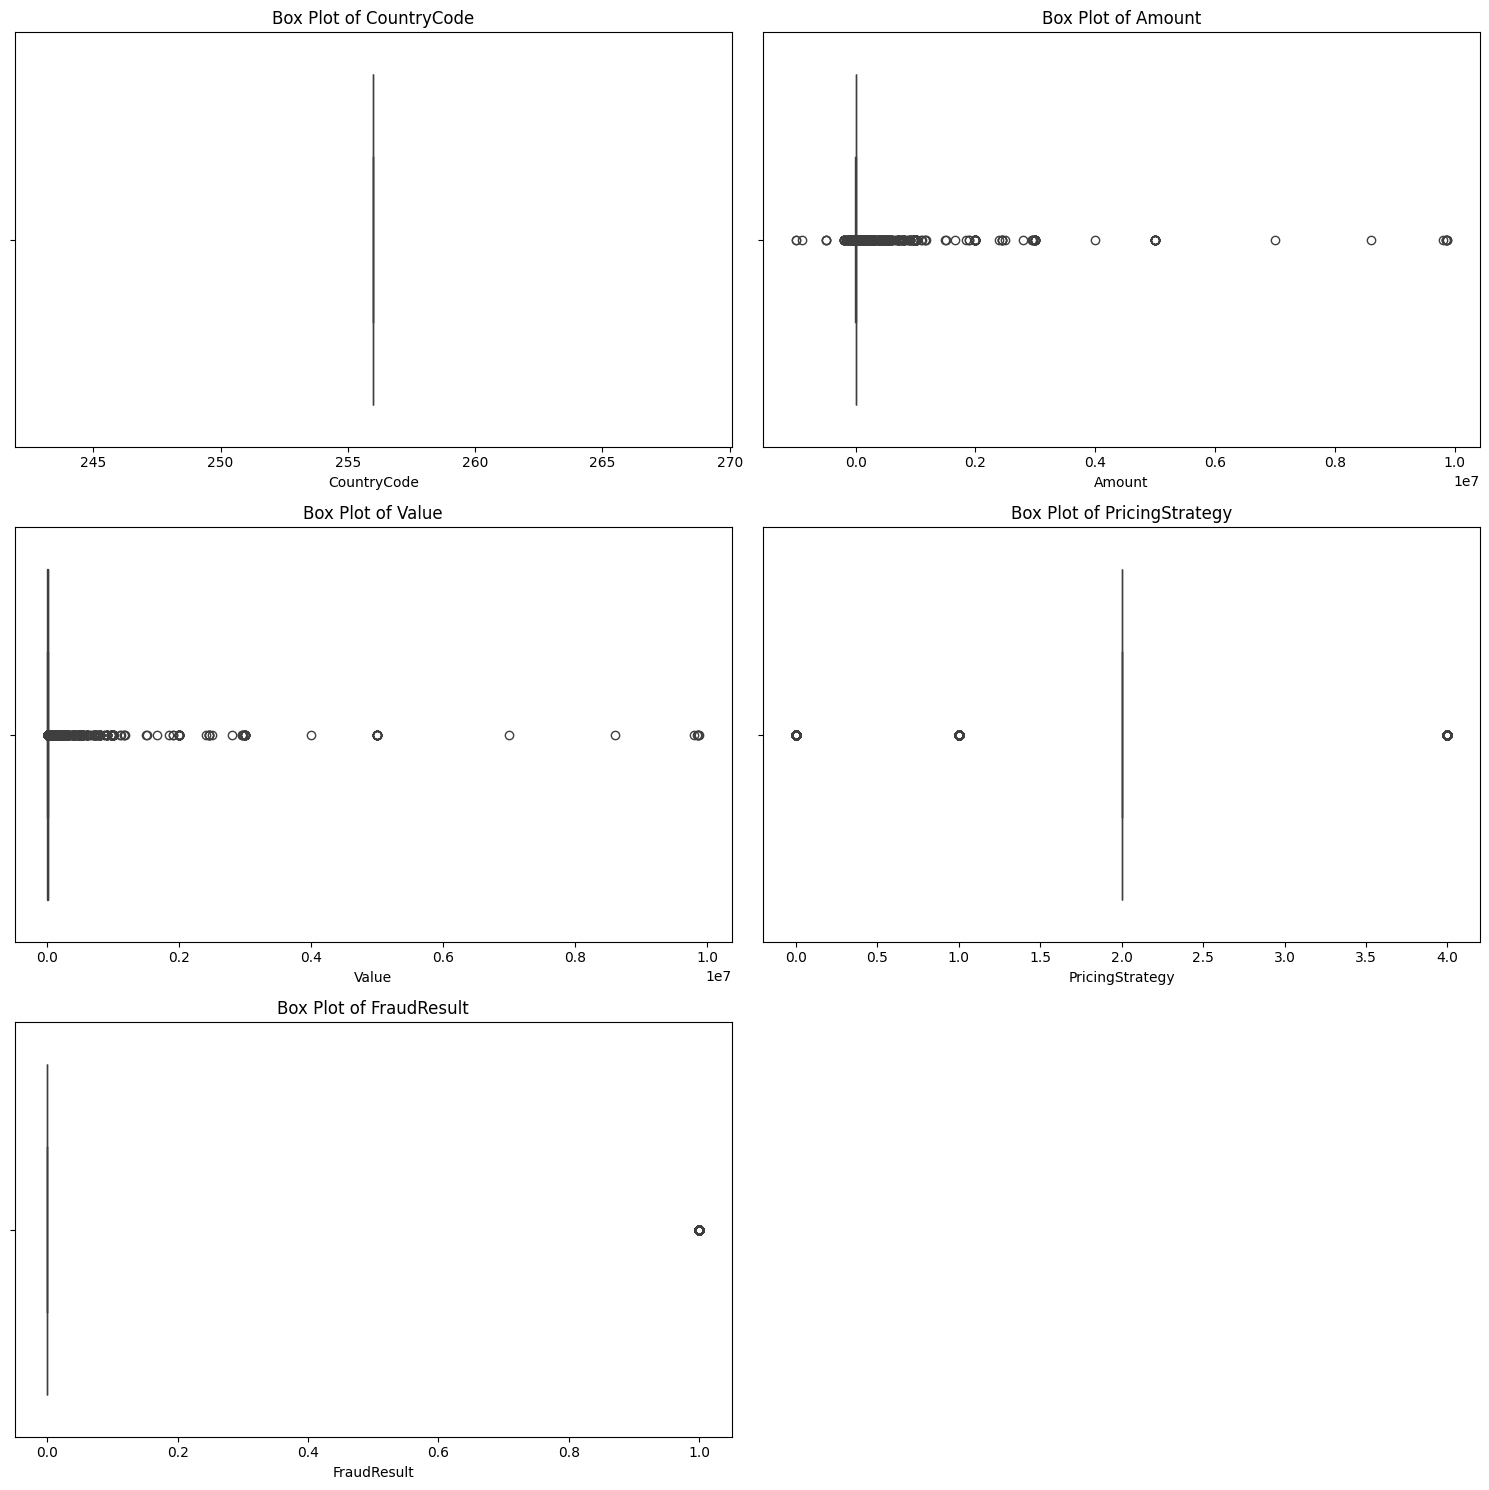

In [16]:
# box plot for outlier Detection
print("\n6. Outlier Detection:")
detect_outliers(df)
logger.info("outlier detection for numeric columns completed")

In [17]:
# convert TransactionStartTime to datetime format
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

### Fraud Analysis

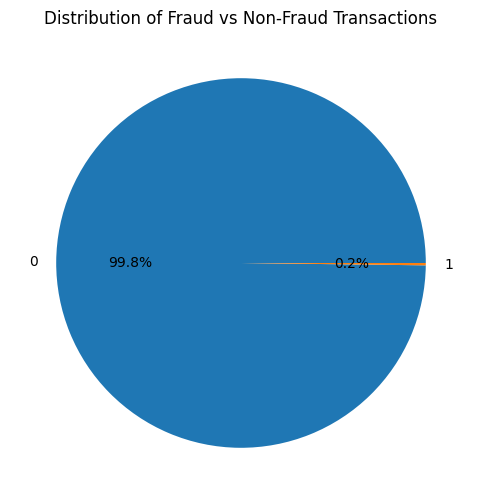

In [18]:
# Fraud Analysis
fraud_counts = df['FraudResult'].value_counts()
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.ylabel('')
plt.show()

## Bivariate Analysis 

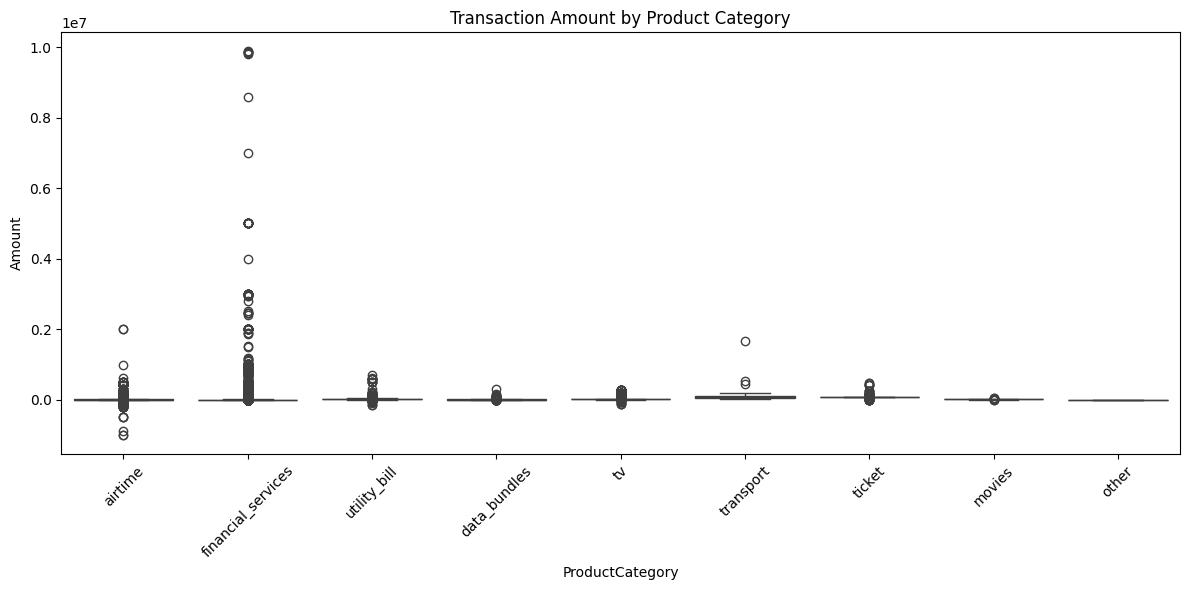

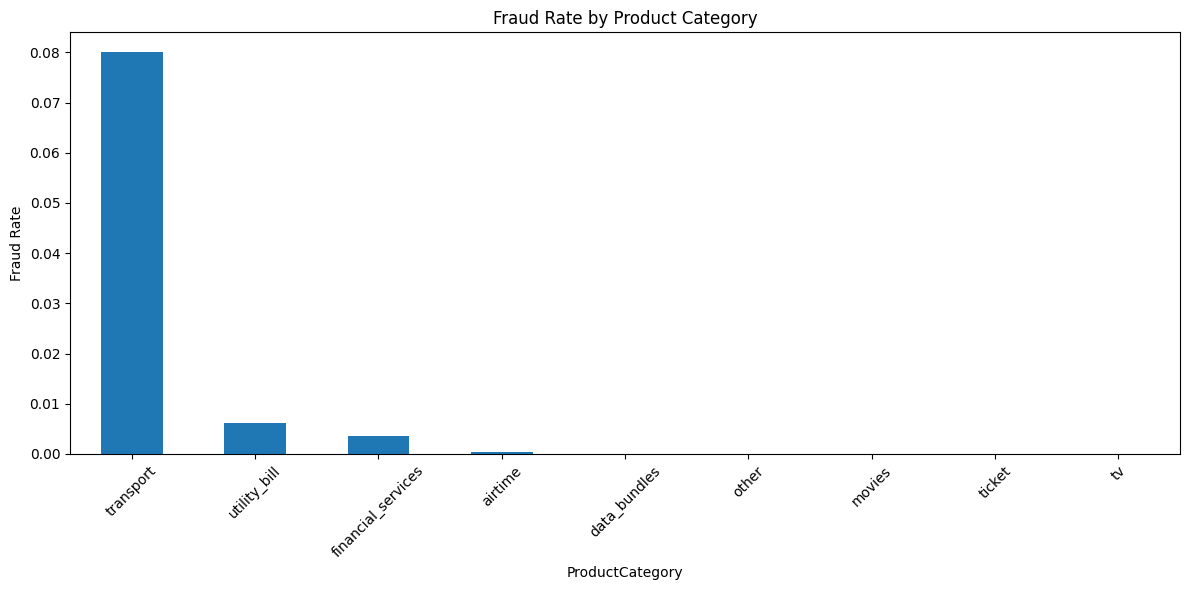

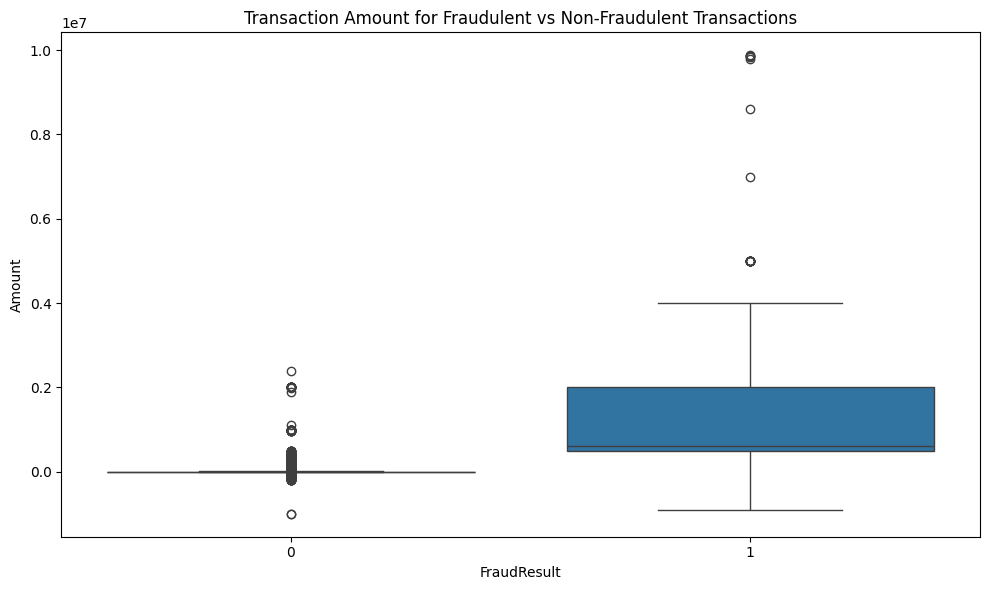

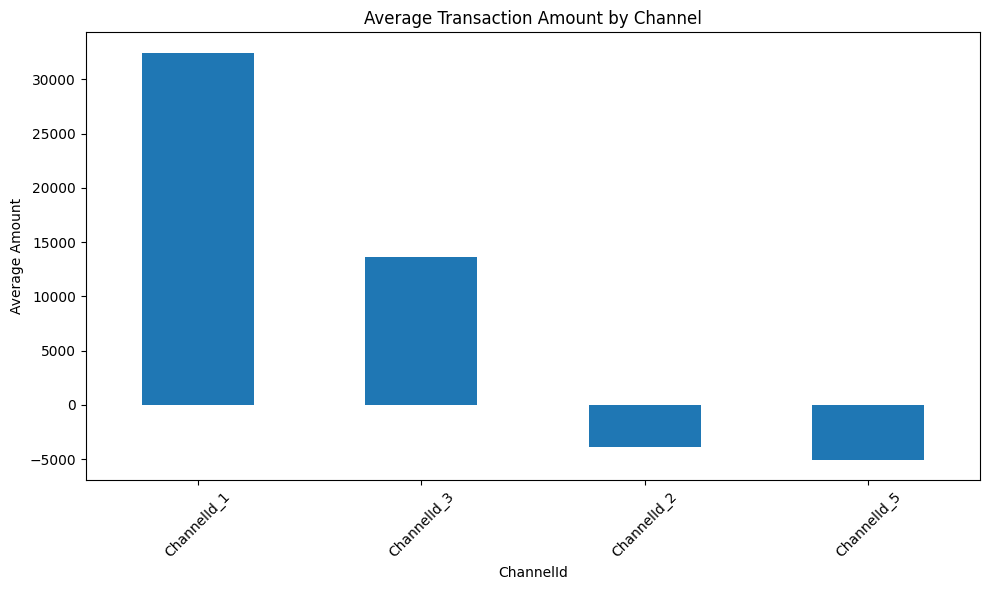

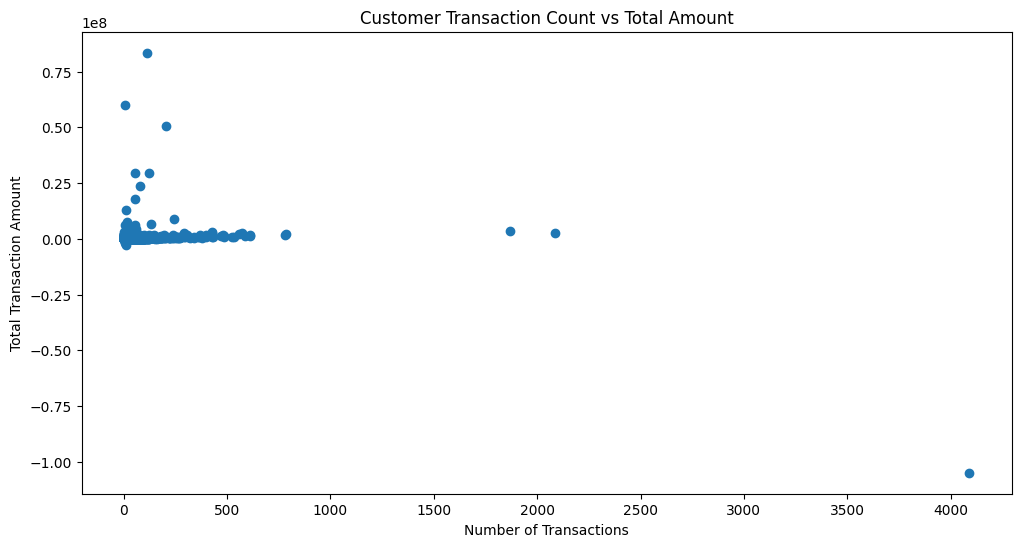

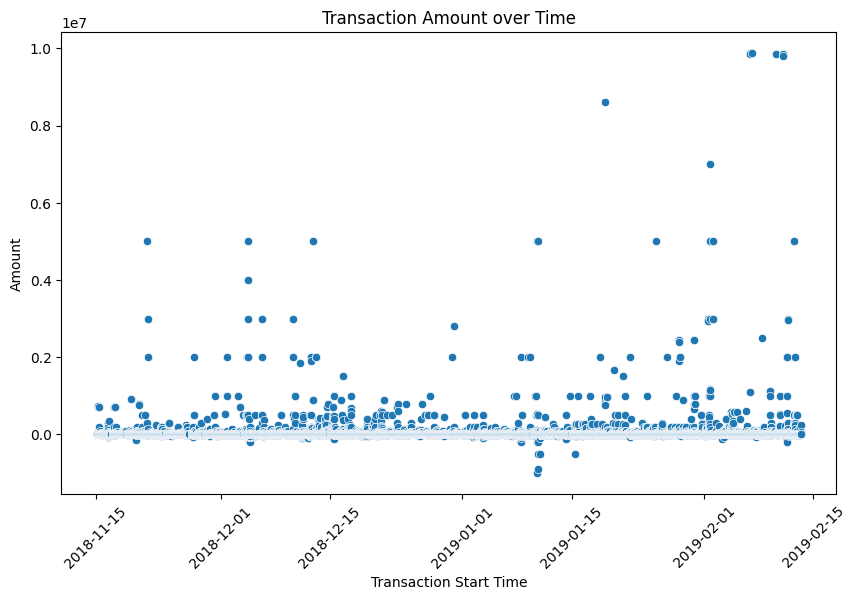

In [19]:
bivariate_analysis(df)
logger.info("Bivariate analysis completed")

plot 1: transaction amounts across different product categories.
- Financial services transactions have the widest range and highest potential values.
- Airtime and financial services appear to be the most frequently used categories.

plot 3: The box plot compares transaction amounts for fraudulent (FraudResult = 1) and non-fraudulent (FraudResult = 0) transactions
 - Fraudulent transactions are much rarer than non-fraudulent ones..
 - The highest-value transactions in the dataset are flagged as fraudulent.
 - Most non-fraudulent transactions are for relatively small amounts

plot 4: The bar chart displays the average transaction amount across different channels.
- ChannelId_1 stands out as the channel with the highest value transactions on average.
- The differences in average amounts could indicate different target users or use cases for each channel.

plot 5: The scatter plot shows the relationship between the number of transactions per customer and their total transaction amount.
- Most customers have relatively few transactions and lower total amounts.
- Some customers make very large transactions, resulting in high total amounts despite fewer transactions.
- The relationship between transaction count and total amount is positive but not strongly linear, indicating high variability in individual transaction amounts.





## Multivariate Analysis

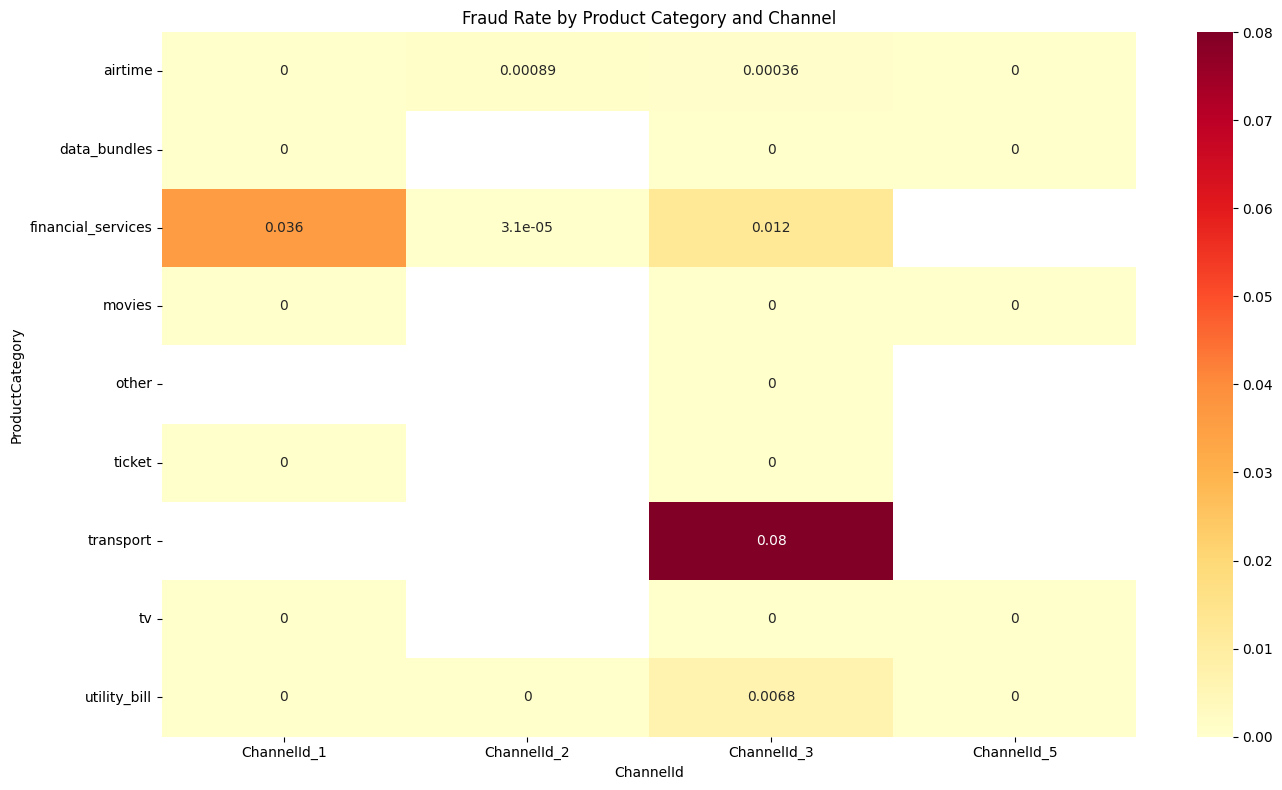

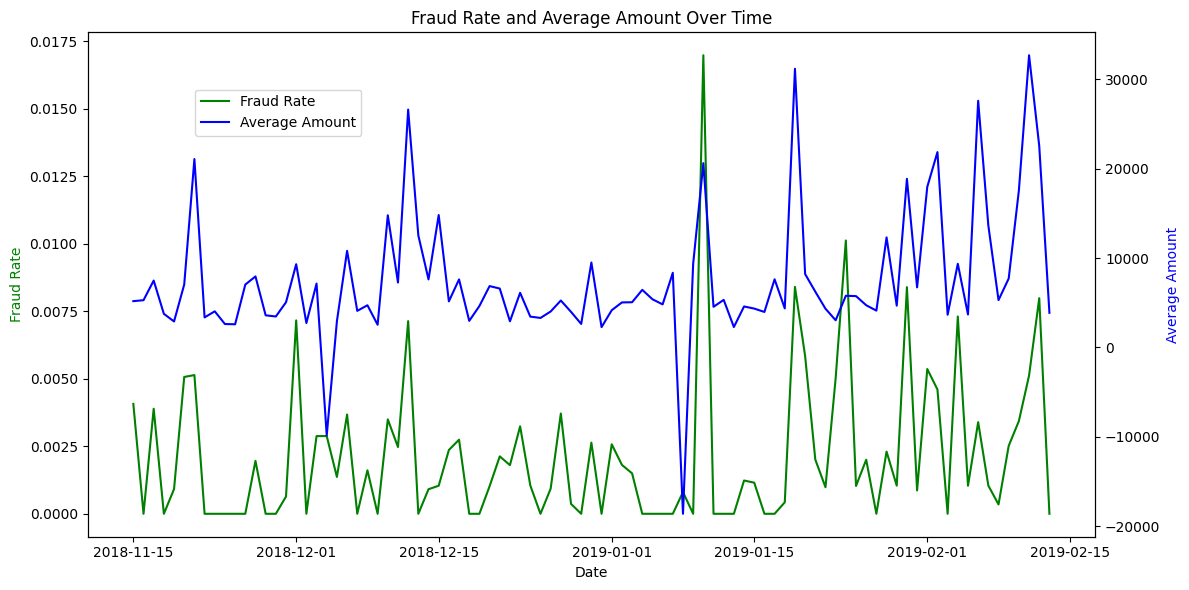

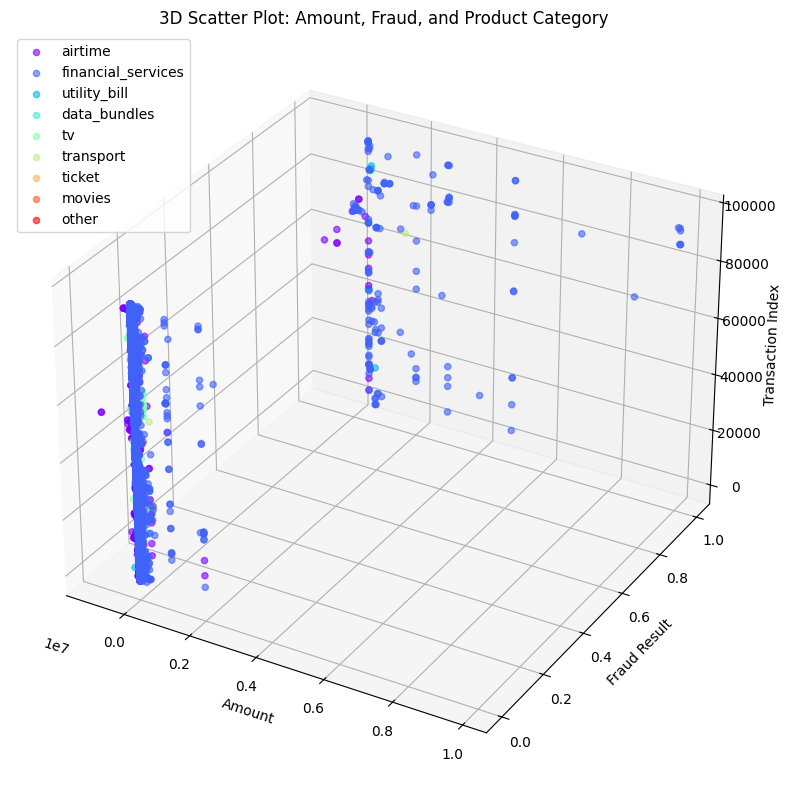

In [20]:
multivariate_analysis(df)

plot 1: The heatmap shows the fraud rate across different product categories and channels.
- ChannelId_3 appears to be the most susceptible to fraud across various product categories.
- Financial services and transport are the most fraud-prone categories, possibly due to higher transaction values or less stringent verification processes.
- The variation in fraud rates suggests that different fraud prevention strategies might be needed for different product-channel combinations.

plot 2: The plot  shows the relationship between fraud rate and average transaction amount over time.
- Fraud rates are generally low but can spike suddenly and significantly.
- Average transaction amounts are highly variable, suggesting a diverse range of transaction types or customer behaviors.
- The lack of clear correlation between fraud rate and average amount suggests that fraud is not solely tied to transaction size.


## Time Series Analysis

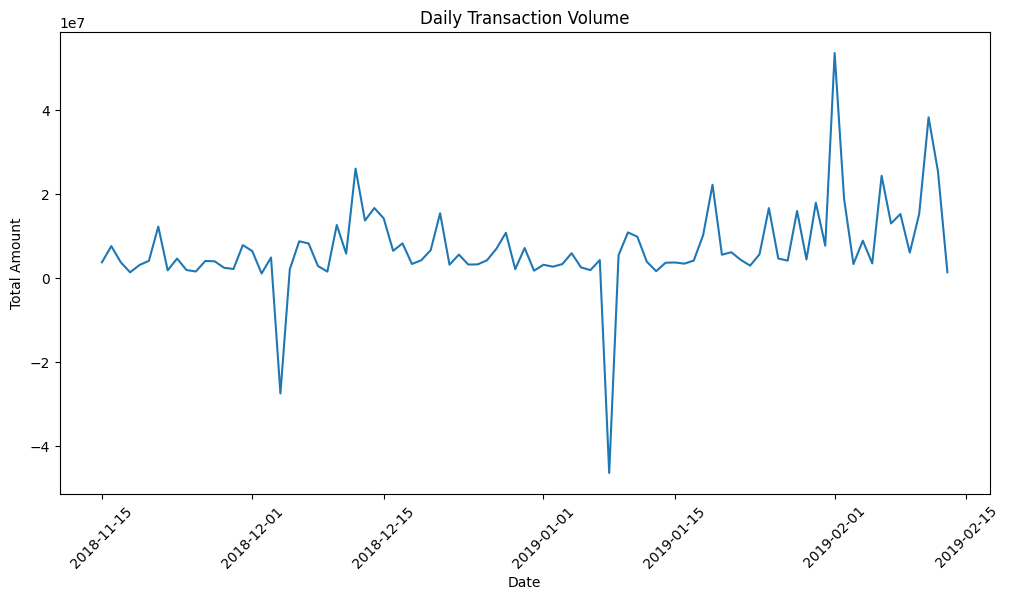

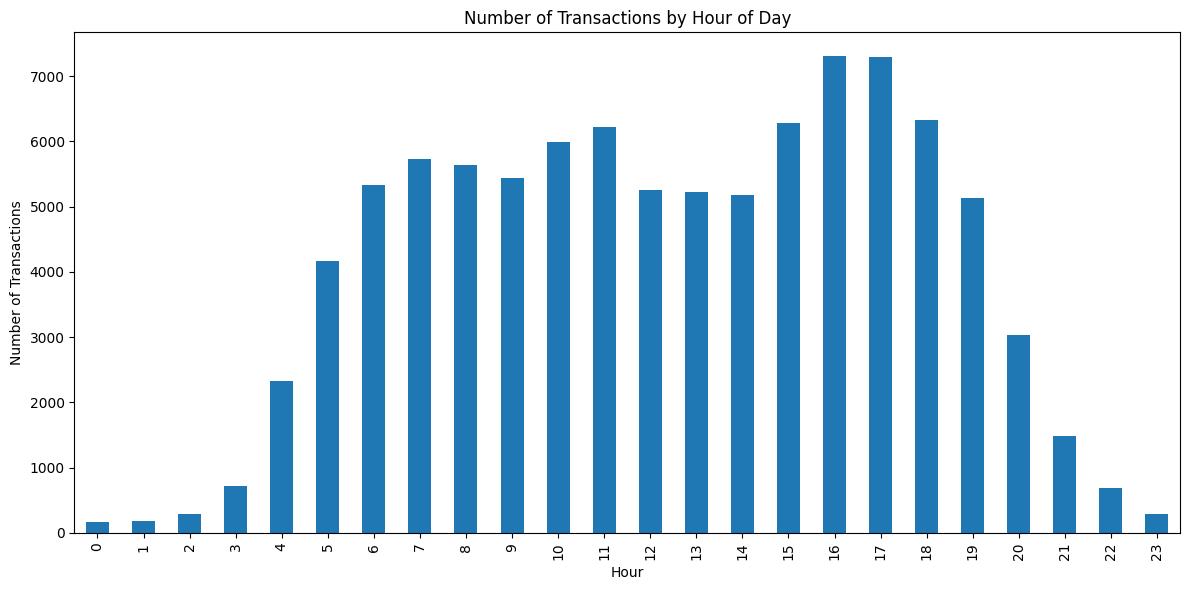

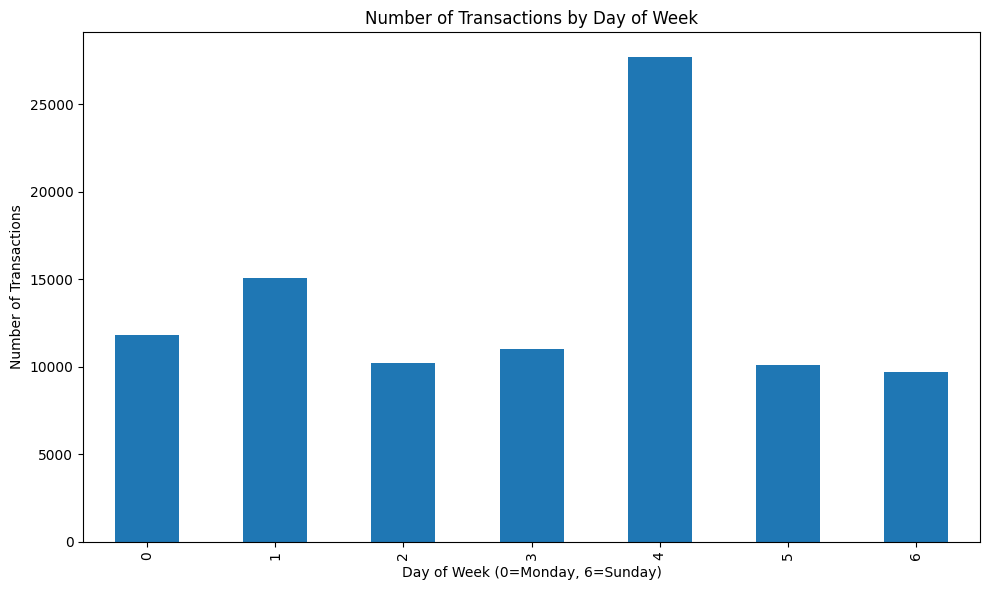

d:\KIFYA AIM\WEEK 6\Project\credit-risk-scoring-model\scripts\eda_analysis.py:262: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_transactions = df.groupby(df['TransactionStartTime'].dt.to_period('M')).agg({


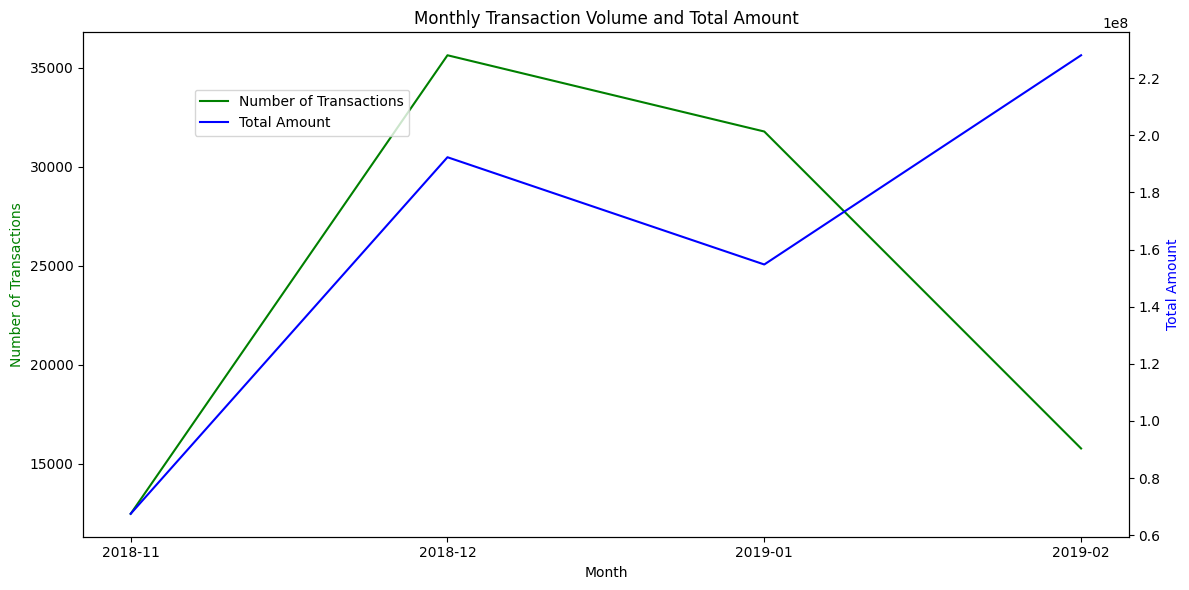

In [21]:
time_series_analysis(df)

plot 3: The  plot shows number of transactions by day of week 
- Friday (day 4) has the highest number of transactions, significantly higher than other days.This suggests people are more likely to conduct transactions before the weekend.
- Tuesday (day 1) has the second-highest number of transactions.
- Weekend days (Saturday and Sunday, days 5 and 6) have the lowest transaction volumes.
- There's a general trend of higher transaction volumes on weekdays compared to weekends

plot 4: The  plot shows monthly transaction volume and total amount
- The December peak in transaction volume likely reflects holiday season shopping. However, the total amount doesn't peak at the same time, suggesting many small transactions.
- There high transaction volume periods and high- amount periods.The diverging trends in transaction count and total amount suggest changing user behavior or market conditions.

